# Summary

```Objective```

Make image patching method

```Methods```

Develop code using torch.nn.functional.unfold

```Results```

todo

# Config

# Libs

In [11]:
import torch

from misalign.models.components.CXFlow import image2patch
from misalign.data.IXI_datamodule import IXIDataModule
from misalign.draw import blend_and_transpose

import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F


# Analysis

path exists for /home/kanghyun/misalign-benchmark/data/IXI/train/prepared_data_0_0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/val/prepared_data_0.0_0.0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/test/prepared_data_0.0_0.0.h5
torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])


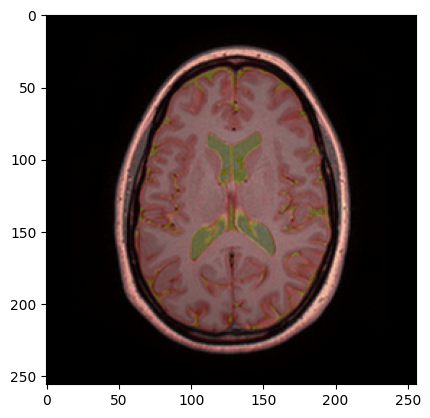

In [12]:
misalign_x = 0
misalign_y = 0

_ = IXIDataModule('/home/kanghyun/misalign-benchmark/data/IXI', batch_size=1, misalign_x=misalign_x, misalign_y=misalign_y)
_.prepare_data()
_.setup()
train_data = _.train_dataloader()

for a, b in train_data:
    print(a.shape, b.shape)
    break

for _a, _b in zip(a,b):
    blended_img = blend_and_transpose(_a[0], _b[0])
    plt.imshow(blended_img)
    plt.show()
    break

In [18]:
patches = image2patch(_a[None], patch_size=16, concat_dim=1) # concat patches to channel dim
print(patches.shape)

patches = image2patch(_a[None], patch_size=16, concat_dim=0) # concat patches to batch dims
print(patches.shape)


torch.Size([1, 256, 16, 16])
torch.Size([256, 1, 16, 16])


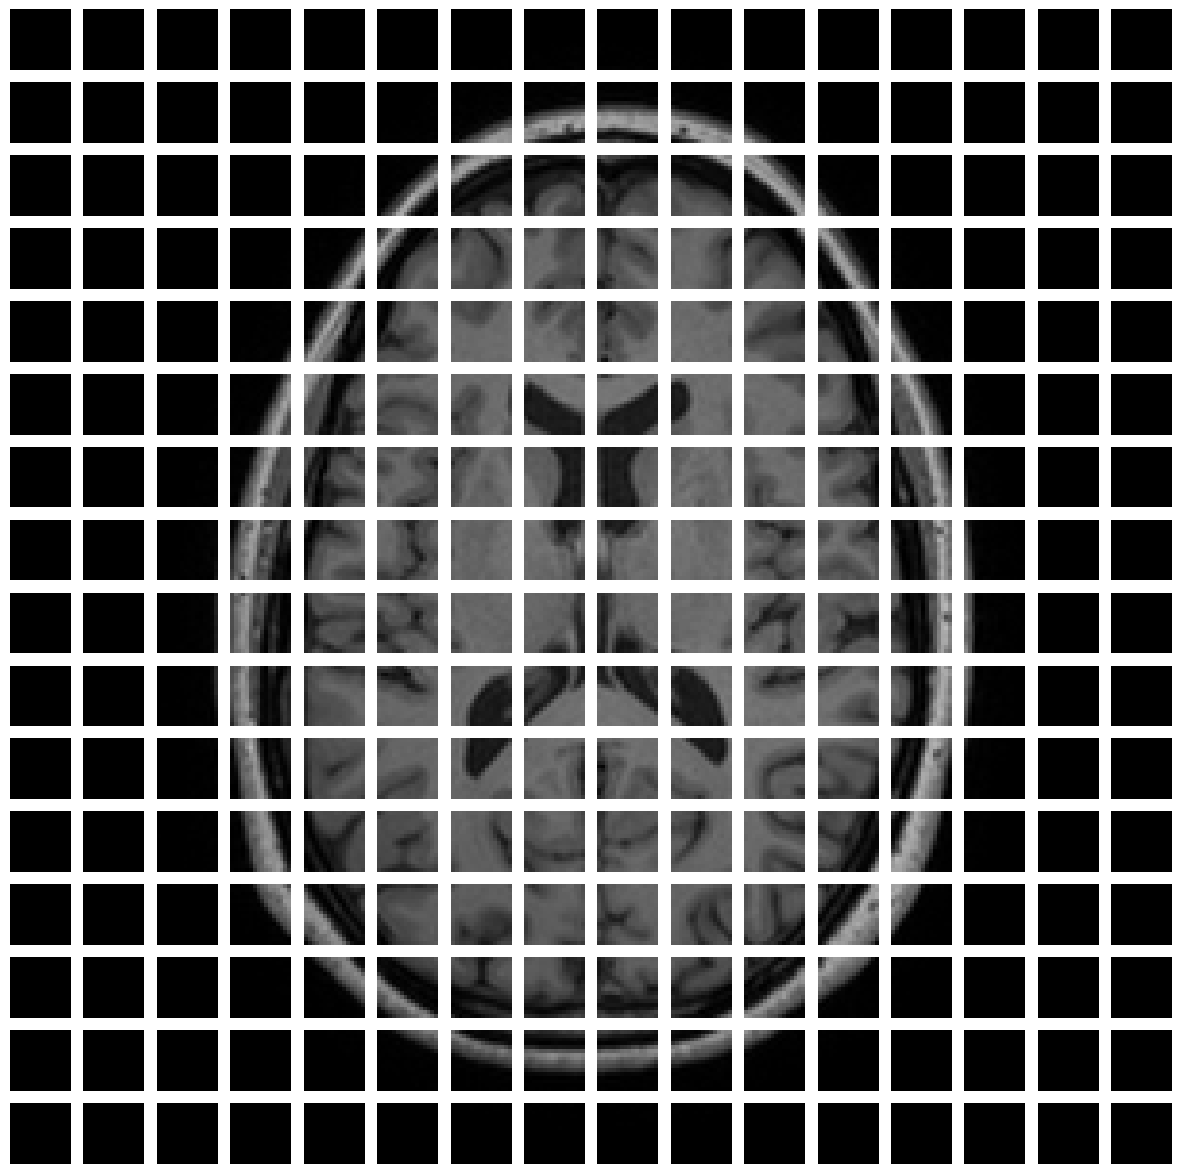

In [19]:
# Calculating grid size for displaying patches
num_patches = patches.shape[0]

grid_size = int(np.ceil(np.sqrt(num_patches)))

# Plotting patches
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# fill up the figure with the patches
for i, ax in enumerate(axes.flat):
    if i < num_patches:
        ax.imshow(patches[i, :, :].detach().numpy().squeeze(), cmap='gray', vmin=-1, vmax=1)
        ax.axis('off')

plt.show()